# The perceptron

In this notebook we will build a simple code for the training of a Perceptron, which can be seen as one of the simplest model for binary classification.

<center><figure><img src="Perceptron.png" width="350"></figure></center>


The perceptron is made by a single node that takes a vector $x\in\mathbb{R}^m$ as an input and returns a value in $\{0,1\}$ by the following rule

$$p(x) = \left\{\begin{array}{ll} 1, & \text{if } w^Tx+b>0\\ 0, &\text{otherwise} \end{array}\right.,$$

where $w\in\mathbb{R}^m$ and $b$ are trainable parameters which determine the weights of the linear combination and the activation threshold.

Let's try to "visualise" the perceptron in a 2D case. 

In [1]:
import numpy as np
import numpy.linalg as npl
import matplotlib.pyplot as plt

In [2]:
xx = np.linspace(-2,2,100)
yy = xx
X,Y = np.meshgrid(xx,yy)

We will now create a dataset for linear binary classification and see how we can train the perceptron to separate the data.

## Training the perceptron
Suppose to have a training set made of N couples $(x_i, y_i)$, with $x_i\in\mathbb{R}^m$ and $y_i\in \{0,1\}$. Training the perceptron means to solve the minimisation problem
$$ \min_{w,b} \sum_{i=1}^N \vert p(x_i) - y_i\vert$$

**Issue:** In this case the objective function is nondifferentiable (and the derivative of $p(x)$ is zero when it is defined), hence the gradient descent method is not applicable.

**Solution:** We can still train the perceptron by using a gradient-descent-like algorithm. The main idea is to sweep the full dataset multiple times (we will refer to them as *epochs*). For each point $x_i$ we can check the sign of $w^Tx_i+b$ and compare it with $y_i$. We, then, update the perceptron parameters as follows:
1. If $p(x_i)=y_i$ we keep $w$ and $b$ fixed.
1. If $p(x_i)=1$ and $y_i=0$ (i.e., the linear combination is "too large") we subtract $x_i$ from $w$ and $1$ from $b$, thus ensuring that
   $$ \bar{w}^Tx_i+\bar{b} = w^Tx_i - x_i^Tx_i + b -1 < w^Tx_i+b $$
1. If $p(x_i)=0$ and $y_i=1$ (i.e., the linear combination is "too small") we add $x_i$ to $w$ and $1$ to $b$, thus ensuring that
   $$ \bar{w}^Tx_i+\bar{b} = w^Tx_i + x_i^Tx_i + b +1 > w^Tx_i+b $$

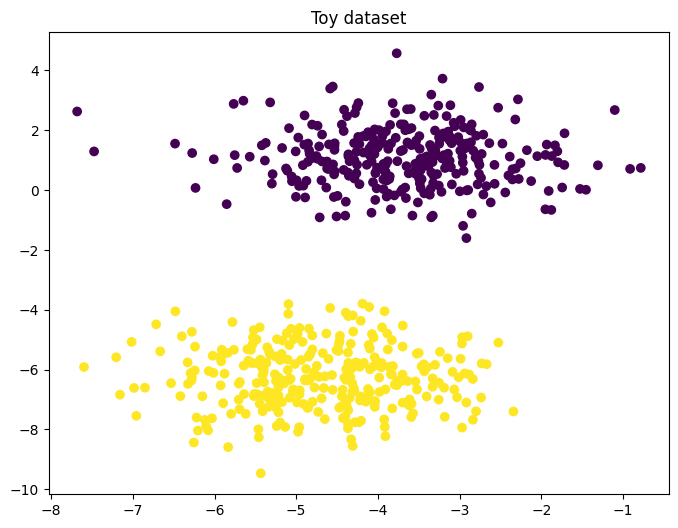

In [12]:
from sklearn.datasets import make_blobs

N = 600
n = 2
data, labels = make_blobs(n_samples=N, centers=2, n_features=n, random_state=156)

# Plot the dataset
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], c = labels)
plt.title("Toy dataset")
plt.show()

#### Non-separable case

## Perceptron and Logistic regression
One of the main drawbacks of the perceptron is the use of the Heavyside step function, which is meant to return a clear decision between '0' and '1'.

However, especially in the non-separable case, such a decision is not always available and one could prefer to deal with probabilities rather than with misleading certainties. An improvement of the basic perceptron model can be obtained by replacing the Heavyside step function with some smooth approximation, such as the sigmoid function
$$ \sigma(z) = \dfrac{1}{1+e^{-z}}$$
<center><figure><img src="Step_vs_sigmoid.png" width="350"></figure></center>

The problem of minimising the empirical risk, in the least squares setting, then becomes
$$ \min_{w,b} \sum_{i=1}^N \frac{1}{2}\left(\dfrac{1}{1+e^{-(w^Tx_i + b)}} - y_i\right)^2 $$
i.e., the problem becomes a **logistic regression** problem.

Let's try to solve it via a gradient descent. Please, recall that $\sigma'(z)=\sigma(z)\left( 1-\sigma(z) \right)$.
**NOTE:** In this case the objective function is **nonconvex**, hence the gradient descent might not be able to find the optimal solution to the problem.